In [61]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city,ride, on = "city")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

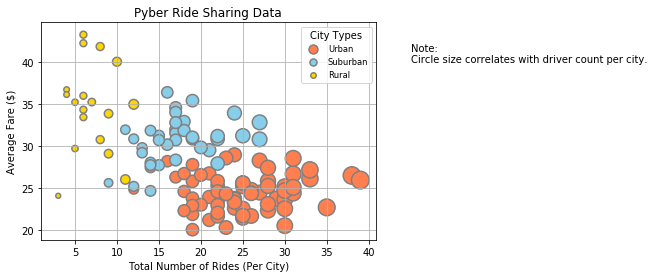

In [62]:
# Obtain the x and y coordinates for each of the three city types


# * City Type (Urban, Suburban, Rural)
city_types = combined_data.groupby('type')

urban_cities = city_types.get_group('Urban')
rural_cities = city_types.get_group('Rural')
suburban_cities = city_types.get_group('Suburban')

# Average Fare ($) Per City
urban_avg_fare = urban_cities.groupby('city').mean()['fare']
suburban_avg_fare = suburban_cities.groupby('city').mean()['fare']
rural_avg_fare = rural_cities.groupby('city').mean()['fare']

# Total Number of Drivers Per City
urban_drivers = urban_cities.groupby('city').count()['driver_count']
suburban_drivers = suburban_cities.groupby('city').count()['driver_count']
rural_drivers = rural_cities.groupby('city').count()['driver_count']

# Total Number of Rides Per City
urban_rides = urban_cities.groupby('city').count()['ride_id']
suburban_rides = suburban_cities.groupby('city').count()['ride_id']
rural_rides = rural_cities.groupby('city').count()['ride_id']


# Build the scatter plots for each city types
plt.scatter(
    x=urban_rides, 
    y=urban_avg_fare, 
    alpha=1, edgecolor='grey',linewidths=1.5,
    s=8*urban_drivers, c='coral', label='Urban'
)

plt.scatter(
    x=suburban_rides,
    y=suburban_avg_fare, 
    edgecolor='grey',alpha=1,linewidths=1.5,
    s=8*suburban_drivers, c='skyblue', 
    label='Suburban'
)

plt.scatter(
    x=rural_rides, 
    y=rural_avg_fare, alpha=1,edgecolor='grey',linewidths=1.5,
    s=8*rural_drivers, c='gold', label = 'Rural'
)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
legend = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)

legend.legendHandles[0]._sizes = [80]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(45,40 , 'Note:\nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig('Images/Ride Sharing Data.png')

plt.show()

In [63]:
# Show plot
plt.show()

## Total Fares by City Type

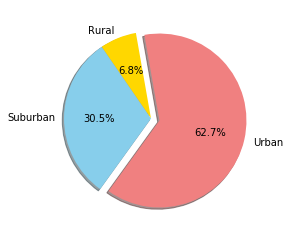

In [64]:
# Calculate Type Percents

total_fares = combined_data['fare'].sum()
urban_percent_fares = urban_cities['fare'].sum() / total_fares * 100
suburban_percent_fares = suburban_cities['fare'].sum() / total_fares * 100
rural_percent_fares = rural_cities['fare'].sum() / total_fares * 100

sizes = [rural_percent_fares,suburban_percent_fares, urban_percent_fares]
labels = ['Rural','Suburban', 'Urban']
colors = ['gold', 'skyblue', 'lightcoral']
explode = [0, 0, 0.1]

# Build Pie Chart

plt.pie(sizes, 
        labels=labels,
        autopct='%1.1f%%',
        explode=explode, 
        shadow=True, 
        colors= colors,startangle=100)
       
# Save Figure
plt.savefig('Images/Total Fares.png')


# Show Figure
plt.show()

## Total Rides by City Type

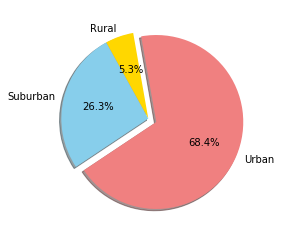

In [65]:
# Calculate Ride Percents
total_rides = combined_data['ride_id'].count()
urban_percent_rides = urban_cities['ride_id'].count() / total_rides * 100
suburban_percent_rides = suburban_cities['ride_id'].count() / total_rides * 100
rural_percent_rides = rural_cities['ride_id'].count() / total_rides * 100

sizes = [rural_percent_rides, suburban_percent_rides, urban_percent_rides]
labels = ['Rural','Suburban', 'Urban']
colors = ['gold', 'skyblue', 'lightcoral']
explode = [0, 0, 0.1]

# Build Pie Chart
plt.pie(sizes, 
        labels=labels,
        autopct='%1.1f%%',
        explode=explode, 
        shadow=True, 
        colors= colors,startangle=100)


# Save Figure
plt.savefig('Images/Total Rides.png')

# Show Figure
plt.show()


## Total Drivers by City Type

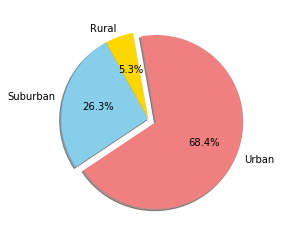

In [66]:
# Calculate Driver Percents
total_drivers = combined_data.groupby('type').sum()['driver_count'].sum()
urban_percent_drivers = urban_drivers.sum() / total_drivers * 100
suburban_percent_drivers = suburban_drivers.sum() / total_drivers * 100
rural_percent_drivers = rural_drivers.sum() / total_drivers * 100

sizes = [rural_percent_drivers,suburban_percent_drivers, urban_percent_drivers]
labels = ['Rural','Suburban', 'Urban']
colors = ['gold', 'skyblue', 'lightcoral']
explode = [0, 0, 0.1]

# Build Pie Charts
plt.pie(sizes, 
        labels=labels,
        autopct='%1.1f%%',
        explode=explode, 
        shadow=True, 
        colors= colors,startangle=100)

# Save Figure
plt.savefig('Images/Total Drivers.png')